**Classification(NLP) using SVM and Naive Bayes with Python**

In [33]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [2]:
np.random.seed(500)

In [3]:
Corpus = pd.read_csv('/content/drive/MyDrive/AdjustedCleanTapasData.csv')
Corpus.head()

,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments,Post
0,tapa adventuring rp,Off Topic,"Nov 28, 2020 12:45 am",8.0,17800.0,24300.0,hey mood roleplaying present adventuring rp no...,created thread set adventurefeel free enter sc...,tapa adventuring rp hey mood roleplaying again...
1,le château de malheureux ddd,Off Topic,"Aug 14, 2020 3:20 pm",5.0,19900.0,35100.0,welcome dungeon ding dong private murder myste...,name carole losnedahlage ft specie angel sorta...,le château de malheureux ddd welcome dungeon d...
2,writer paid collabs,Off Topic,"Jul 22, 2021 4:40 pm",0.0,1.0,11.0,hello enquire collabs script tell adapt either...,rate artist pay adapt,writer paid collabs how it hello enquire colla...
3,fantasy book unique worldbuilding,Off Topic,"Jul 22, 2021 2:24 pm",5.0,3.0,39.0,found featured article worldbuilding huge fan ...,awesome done must pretty wild featured alongsi...,fantasy book unique worldbuilding found featur...
4,game playing right,Off Topic,"Nov 10, 2019 1:34 pm",13.0,1000.0,10600.0,video game board game hand held game puzzle ga...,simplykit video game fire emblem enjoying micr...,what game playing right now video game board g...


In [4]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['Title'],Corpus['Category'],test_size=0.3)

In [5]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [6]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['Title'].values.astype('U'))

Train_X_Tfidf = Tfidf_vect.transform(Train_X.values.astype('U'))
Test_X_Tfidf = Tfidf_vect.transform(Test_X.values.astype('U'))

In [7]:
Tfidf_vect.vocabulary_

{'tapa': 4224,
 'adventuring': 91,
 'rp': 3554,
 'le': 2140,
 'château': 815,
 'de': 1240,
 'malheureux': 2315,
 'ddd': 1239,
 'writer': 4922,
 'paid': 2803,
 'collabs': 888,
 'fantasy': 1724,
 'book': 571,
 'unique': 4548,
 'worldbuilding': 4903,
 'game': 1843,
 'playing': 2962,
 'right': 3517,
 'whats': 4814,
 'yalls': 4962,
 'opinion': 2741,
 'religion': 3383,
 'help': 1948,
 'description': 1291,
 'struggle': 4065,
 'within': 4864,
 'favorite': 1747,
 'character': 762,
 'personality': 2903,
 'andor': 173,
 'dynamic': 1466,
 'hot': 1975,
 'take': 4207,
 'need': 2585,
 'sub': 4082,
 'reader': 3275,
 'random': 3249,
 'post': 3026,
 'disputable': 1383,
 'cheese': 782,
 'reject': 3371,
 'webtoon': 4775,
 'embrace': 1527,
 'birthday': 512,
 'dad': 1216,
 'today': 4380,
 'think': 4323,
 'amazon': 162,
 'bezos': 498,
 'listening': 2212,
 'meme': 2403,
 'drop': 1449,
 'like': 2181,
 'movie': 2513,
 'watching': 4744,
 'watercooler': 4748,
 'place': 2949,
 'chat': 774,
 'friendly': 1827,
 'rem

In [8]:
Train_X_Tfidf

<6091x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 24728 stored elements in Compressed Sparse Row format>

In [9]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  53.58100344695519


In [10]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  54.23209498276522


**More Naive Bayes**

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
clf = SVC(kernel='linear').fit(Train_X_Tfidf, Train_Y)
y_score = clf.predict(Test_X_Tfidf)

n_right = 0
for i in range(len(y_score)):
    if y_score[i] == Test_Y[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(Test_Y)) * 100)))

Accuracy: 54.23%


In [12]:
Corpus['Category'].unique()

array(['Off Topic', 'Art | Comics', 'Writing | Novels', 'Collaborations',
       'Questions', 'Tech Support | Site Feedback', 'Promotions',
       'Events | Challenges', 'Reviews | Feedback'], dtype=object)

In [13]:
my_categories = ['Off Topic', 'Art | Comics', 'Writing | Novels', 'Collaborations',
       'Questions', 'Tech Support | Site Feedback', 'Promotions',
       'Events | Challenges', 'Reviews | Feedback']

**SGD**

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(Train_X.values.astype('U'), Train_Y)

y_pred = sgd.predict(Test_X.values.astype('U'))

print('accuracy: %s' % accuracy_score(y_pred, Test_Y))
res1321 = accuracy_score(y_pred, Test_Y)

accuracy: 0.5247031788586748


**More Naive Bayes**

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(Train_X.values.astype('U'), Train_Y)


from sklearn.metrics import classification_report
y_pred = sgd.predict(Test_X.values.astype('U'))

print('accuracy: %s' % accuracy_score(y_pred, Test_Y))
res1311 = accuracy_score(y_pred, Test_Y)

accuracy: 0.5247031788586748


**Logistic Regression**

In [16]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(Train_X.values.astype('U'), Train_Y)

y_pred = logreg.predict (Test_X.values.astype('U'))

print('accuracy: %s' % accuracy_score(y_pred, Test_Y))
res1331 = accuracy_score(y_pred, Test_Y)

accuracy: 0.47223286097280737


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Decision Tree Classifier**

In [17]:
from sklearn.tree import DecisionTreeClassifier

dtree = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier(random_state=0)),
               ])
dtree.fit(Train_X.values.astype('U'), Train_Y)

y_pred = dtree.predict (Test_X.values.astype('U'))

print('accuracy: %s' % accuracy_score(y_pred, Test_Y))
res1341 = accuracy_score(y_pred, Test_Y)

accuracy: 0.45653006510915356


**XGBoost**

In [18]:
!pip install xgboost

In [19]:
import xgboost as xgb
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

xgb = Pipeline(steps=[('vect', TfidfVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('xgboost', xgb.XGBClassifier(objective='multi:softmax'))])

cv_res_xgb_tfidf = cross_val_score(xgb,Train_X.values.astype('U'), Train_Y, cv=10)
mean_cv_res_xgb_tfidf = np.mean(cv_res_xgb_tfidf)

In [20]:
mean_cv_res_xgb_tfidf

0.5002500740262187

**Light GBM**

In [21]:
!pip install lightgbm

In [22]:
import lightgbm as lgbm

test_df = Corpus.copy()

tfidf_vec = TfidfVectorizer(dtype=np.float32, sublinear_tf=True, use_idf=True, smooth_idf=True)
X_data_tfidf = tfidf_vec.fit_transform(test_df['Original Post'].values.astype('U'))
X_train_tfidf = tfidf_vec.transform(Train_X.values.astype('U'))
X_test_tfidf = tfidf_vec.transform(Test_X.values.astype('U'))

clf_LGBM = lgbm.LGBMClassifier(objective='multiclass', verbose=-1, learning_rate=0.5, max_depth=20, num_leaves=50, n_estimators=120, max_bin=2000,)
clf_LGBM.fit(X_train_tfidf, Train_Y, verbose=-1)
predicted_LGBM = clf_LGBM.predict(X_test_tfidf)

In [23]:
from sklearn.model_selection import cross_val_score
cv_res_lgbm_tfidf = cross_val_score(clf_LGBM, X_train_tfidf, Train_Y, cv=10)
mean_cv_res_lgbm_tfidf = np.mean(cv_res_lgbm_tfidf)
mean_cv_res_lgbm_tfidf

0.3866367869929204

In [24]:
print('accuracy %s' % accuracy_score(predicted_LGBM, Test_Y))
res_lgbm = accuracy_score(predicted_LGBM, Test_Y)

accuracy 0.3764841057066258


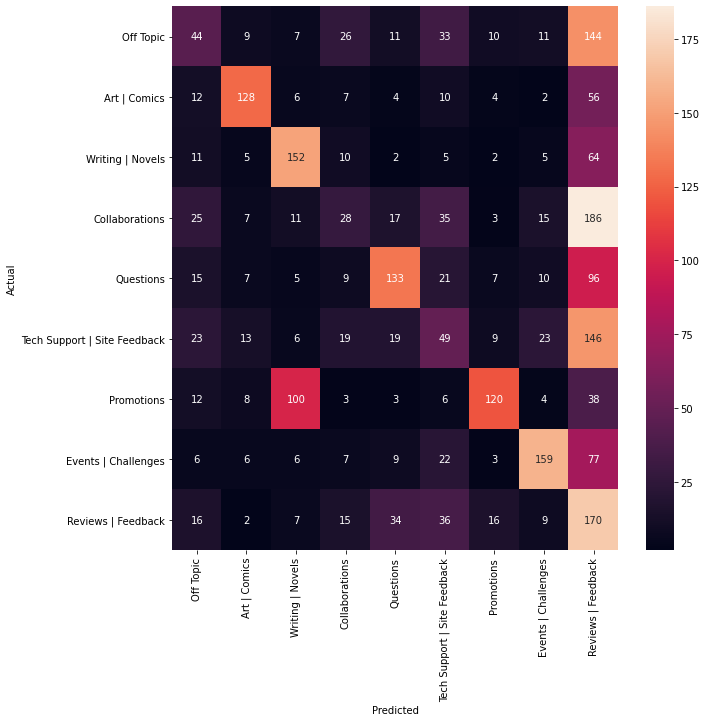

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(Test_Y, predicted_LGBM)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=my_categories, yticklabels=my_categories)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**BERT**

In [26]:
# install simpletransformers
!pip install simpletransformers

# check installed version
!pip freeze | grep simpletransformers
# simpletransformers==0.28.2

simpletransformers==0.61.13


In [27]:
!pip install tokenizers==0.9.4

     |████████████████████████████████| 2.9 MB 7.4 MB/s 
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.10.1
    Uninstalling tokenizers-0.10.1:
      Successfully uninstalled tokenizers-0.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.9.2 requires tokenizers<0.11,>=0.10.1, but you have tokenizers 0.9.4 which is incompatible.


In [10]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/AdjustedCleanTapasData.csv')

print(df.shape)
df.head()

(8702, 9)


,Title,Category,Date,Likes,Num Replies,Num Views,Original Post,Comments,Post
0,tapa adventuring rp,Off Topic,"Nov 28, 2020 12:45 am",8.0,17800.0,24300.0,hey mood roleplaying present adventuring rp no...,created thread set adventurefeel free enter sc...,tapa adventuring rp hey mood roleplaying again...
1,le château de malheureux ddd,Off Topic,"Aug 14, 2020 3:20 pm",5.0,19900.0,35100.0,welcome dungeon ding dong private murder myste...,name carole losnedahlage ft specie angel sorta...,le château de malheureux ddd welcome dungeon d...
2,writer paid collabs,Off Topic,"Jul 22, 2021 4:40 pm",0.0,1.0,11.0,hello enquire collabs script tell adapt either...,rate artist pay adapt,writer paid collabs how it hello enquire colla...
3,fantasy book unique worldbuilding,Off Topic,"Jul 22, 2021 2:24 pm",5.0,3.0,39.0,found featured article worldbuilding huge fan ...,awesome done must pretty wild featured alongsi...,fantasy book unique worldbuilding found featur...
4,game playing right,Off Topic,"Nov 10, 2019 1:34 pm",13.0,1000.0,10600.0,video game board game hand held game puzzle ga...,simplykit video game fire emblem enjoying micr...,what game playing right now video game board g...


In [11]:
df['Category'].unique()

array(['Off Topic', 'Art | Comics', 'Writing | Novels', 'Collaborations',
       'Questions', 'Tech Support | Site Feedback', 'Promotions',
       'Events | Challenges', 'Reviews | Feedback'], dtype=object)

In [12]:
class_list = ['Off Topic', 'Art | Comics', 'Writing | Novels', 'Collaborations',
       'Questions', 'Tech Support | Site Feedback', 'Promotions',
       'Events | Challenges', 'Reviews | Feedback']
new_df = pd.DataFrame()
new_df['post'] = df['Title'] + ' ' + df['Original Post']
new_df['category'] = df['Category']
new_df['post'] = new_df['post'].apply(lambda x: str(x))
new_df['category'] = new_df['category'].apply(lambda x: str(x))

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [31]:
len(class_list)

9

In [32]:
new_df.head()

,post,category
0,tapa adventuring rp hey mood roleplaying prese...,Off Topic
1,le château de malheureux ddd welcome dungeon d...,Off Topic
2,writer paid collabs hello enquire collabs scri...,Off Topic
3,fantasy book unique worldbuilding found featur...,Off Topic
4,game playing right video game board game hand ...,Off Topic


In [33]:
# changing class names (text) to numbers (a necessity for simpletransformers library)
new_df['category'] = new_df.apply(lambda x:  class_list.index(x['category']),axis=1)

In [34]:
new_df.head()

,post,category
0,tapa adventuring rp hey mood roleplaying prese...,0
1,le château de malheureux ddd welcome dungeon d...,0
2,writer paid collabs hello enquire collabs scri...,0
3,fantasy book unique worldbuilding found featur...,0
4,game playing right video game board game hand ...,0


In [35]:
new_df['category'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [36]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(new_df, test_size=0.10)

print('train shape: ',train_df.shape)
print('test shape: ',test_df.shape)

train shape:  (7831, 2)
test shape:  (871, 2)


In [37]:
# install simpletransformers
!pip install simpletransformers

# check installed version
!pip freeze | grep simpletransformers
# simpletransformers==0.28.2

  Using cached tokenizers-0.10.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (3.3 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.9.4
    Uninstalling tokenizers-0.9.4:
      Successfully uninstalled tokenizers-0.9.4
simpletransformers==0.61.13


In [38]:
from simpletransformers.classification import ClassificationModel

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 4}

# Create a ClassificationModel
model = ClassificationModel(
    "bert", "bert-base-cased",
    num_labels=12,
    args=train_args
)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

In [39]:
# Train the model
model.train_model(train_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:616: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/7831 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/979 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/979 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/979 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/979 [00:00<?, ?it/s]

(3916, 0.873248531734257)

In [40]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result, model_outputs, wrong_predictions = model.eval_model(test_df, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1402: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/871 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/109 [00:00<?, ?it/s]

In [41]:
result

{'mcc': 0.6143162421569017,
 'f1': 0.6567164179104478,
 'acc': 0.6567164179104478,
 'eval_loss': 1.3511889942605562}

In [42]:
import os
import tarfile

def save_model(model_path='',file_name=''):
  files = [files for root, dirs, files in os.walk(model_path)][0]
  with tarfile.open(file_name+ '.tar.gz', 'w:gz') as f:
    for file in files:
      f.add(f'{model_path}/{file}')

In [43]:
save_model('outputs','tapasforum-bert-categclass')

In [44]:
!tar -zxvf ./tapasforum-bert-categclass.tar.gz

outputs/tokenizer_config.json
outputs/vocab.txt
outputs/special_tokens_map.json
outputs/training_args.bin
outputs/eval_results.txt
outputs/merges.txt
outputs/pytorch_model.bin
outputs/vocab.json
outputs/tokenizer.json
outputs/model_args.json
outputs/config.json


In [45]:
!rm -rf outputs

In [46]:
import os
import tarfile

def unpack_model(model_name=''): 
  tar = tarfile.open('/content/tapasforum-bert-categclass.tar.gz')
  tar.extractall()
  tar.close()

unpack_model('tapasforum-bert-categclass')

In [47]:
from simpletransformers.classification import ClassificationModel

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 4}

# Create a ClassificationModel
model = ClassificationModel(
    "bert", "outputs/",
    num_labels=12,
    args=train_args
)

In [48]:
class_list = ['Off Topic', 'Art | Comics', 'Writing | Novels', 'Collaborations',
       'Questions', 'Tech Support | Site Feedback', 'Promotions',
       'Events | Challenges', 'Reviews | Feedback']

post = "game playing right"

predictions, raw_outputs = model.predict([post])

print(class_list[predictions[0]])
# Label : Flowster-specific

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Off Topic


In [49]:
post2 = "hello enquire collabs script tell adapt either"

predictions, raw_outputs = model.predict([post2])

print(class_list[predictions[0]])
# Label : Flowster-specific

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Art | Comics


In [50]:
post3 = 'fantasy book unique worldbuilding'

predictions, raw_outputs = model.predict([post3])

print(class_list[predictions[0]])
# Label : Product Sourcing

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Off Topic


In [51]:
post4 = 'found featured article worldbuilding huge fan'

predictions, raw_outputs = model.predict([post4])

print(class_list[predictions[0]])
# Label : Traffic Sources

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Questions


**RoBERTa, XLNet, XLM, and DistilBERT**

In [1]:
!pip install simpletransformers

     |████████████████████████████████| 221 kB 12.8 MB/s 
     |████████████████████████████████| 2.6 MB 31.0 MB/s 
     |████████████████████████████████| 3.3 MB 47.4 MB/s 
     |████████████████████████████████| 1.6 MB 32.9 MB/s 
     |████████████████████████████████| 8.0 MB 24.5 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 1.2 MB 38.7 MB/s 
     |████████████████████████████████| 124 kB 53.1 MB/s 
     |████████████████████████████████| 264 kB 43.8 MB/s 
     |████████████████████████████████| 636 kB 39.8 MB/s 
     |████████████████████████████████| 895 kB 38.9 MB/s 
     |████████████████████████████████| 170 kB 48.4 MB/s 
     |████████████████████████████████| 133 kB 49.4 MB/s 
     |████████████████████████████████| 97 kB 6.7 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 243 kB 51.1 MB/s 
     |████████████████████████████████| 118 kB 52.4 MB/s 
     |██████████████

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
!pip install tokenizers==0.10.1

     |████████████████████████████████| 3.2 MB 12.7 MB/s 
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.10.3
    Uninstalling tokenizers-0.10.3:
      Successfully uninstalled tokenizers-0.10.3


**GitHub example**

- Test if everything is working fine : https://github.com/ThilinaRajapakse/simpletransformers#a-quick-example

In [4]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import logging

In [5]:
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# Preparing train data
train_data = [
    ["Aragorn was the heir of Isildur", 1],
    ["Frodo was the heir of Isildur", 0],
]
train_df = pd.DataFrame(train_data)
train_df.columns = ["text", "labels"]

# Preparing eval data
eval_data = [
    ["Theoden was the king of Rohan", 1],
    ["Merry was the king of Rohan", 0],
]
eval_df = pd.DataFrame(eval_data)
eval_df.columns = ["text", "labels"]

# Optional model configuration
model_args = ClassificationArgs(num_train_epochs=1)

# Create a ClassificationModel
model = ClassificationModel(
    "roberta", "roberta-base", args=model_args, use_cuda=False)

# Train the model
model.train_model(train_df)

# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

# Make predictions with the model
predictions, raw_outputs = model.predict(["Sam was a Wizard"])

INFO:filelock:Lock 140706225392208 acquired on /root/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b.lock


Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

INFO:filelock:Lock 140706225392208 released on /root/.cache/huggingface/transformers/733bade19e5f0ce98e6531021dd5180994bb2f7b8bd7e80c7968805834ba351e.35205c6cfc956461d8515139f0f8dd5d207a2f336c0c3a83b4bc8dca3518e37b.lock
INFO:filelock:Lock 140706225392720 acquired on /root/.cache/huggingface/transformers/51ba668f7ff34e7cdfa9561e8361747738113878850a7d717dbc69de8683aaad.c7efaa30a0d80b2958b876969faa180e485944a849deee4ad482332de65365a7.lock


Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

INFO:filelock:Lock 140706225392720 released on /root/.cache/huggingface/transformers/51ba668f7ff34e7cdfa9561e8361747738113878850a7d717dbc69de8683aaad.c7efaa30a0d80b2958b876969faa180e485944a849deee4ad482332de65365a7.lock
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of R

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

INFO:filelock:Lock 140703252316112 released on /root/.cache/huggingface/transformers/d3ccdbfeb9aaa747ef20432d4976c32ee3fa69663b379deb253ccfce2bb1fdc5.d67d6b367eb24ab43b08ad55e014cf254076934f71d832bbab9ad35644a375ab.lock
INFO:filelock:Lock 140703251981200 acquired on /root/.cache/huggingface/transformers/cafdecc90fcab17011e12ac813dd574b4b3fea39da6dd817813efa010262ff3f.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b.lock


Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

INFO:filelock:Lock 140703251981200 released on /root/.cache/huggingface/transformers/cafdecc90fcab17011e12ac813dd574b4b3fea39da6dd817813efa010262ff3f.5d12962c5ee615a4c803841266e9c3be9a691a924f72d395d3a6c6c81157788b.lock
INFO:filelock:Lock 140703252314896 acquired on /root/.cache/huggingface/transformers/d53fc0fa09b8342651efd4073d75e19617b3e51287c2a535becda5808a8db287.fc9576039592f026ad76a1c231b89aee8668488c671dfbe6616bab2ed298d730.lock


Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

INFO:filelock:Lock 140703252314896 released on /root/.cache/huggingface/transformers/d53fc0fa09b8342651efd4073d75e19617b3e51287c2a535becda5808a8db287.fc9576039592f026ad76a1c231b89aee8668488c671dfbe6616bab2ed298d730.lock
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_roberta_128_2_2


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of roberta model complete. Saved to outputs/.
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_roberta_128_2_2


Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
INFO:simpletransformers.classification.classification_model:{'mcc': 0.0, 'tp': 0, 'tn': 1, 'fp': 0, 'fn': 1, 'auroc': 0.0, 'auprc': 0.5, 'eval_loss': 0.6937332153320312}
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
predictions, raw_outputs

(array([0]), array([[ 0.00757987, -0.05074205]]))

In [7]:
result, model_outputs, wrong_predictions

({'auprc': 0.5,
  'auroc': 0.0,
  'eval_loss': 0.6937332153320312,
  'fn': 1,
  'fp': 0,
  'mcc': 0.0,
  'tn': 1,
  'tp': 0},
 array([[ 0.01260521, -0.05088605],
        [ 0.0127484 , -0.05040323]]),
 [['Theoden was the king of Rohan', 'Merry was the king of Rohan']])

**Real Dataset**

In [13]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/AdjustedCleanTapasData.csv')
# train_df['Title'] = train_df.iloc[:, 0] + " " + train_df.iloc[:, 1]
train_df = train_df.drop(train_df.columns[[2, 3, 4, 5, 6, 7, 8]], axis=1)
# train_df.columns = ['Category', 'Title']
train_df = train_df[['Title', 'Category']]
# train_df['Title'] = train_df['Title'].apply(lambda x: x.replace('\\', ' '))
# train_df['Category'] = train_df['Category'].apply(lambda x:x-1)
train_df['Category'] = train_df.apply(lambda x:  class_list.index(x['Category']),axis=1)

eval_df = pd.read_csv('/content/drive/MyDrive/AdjustedCleanTapasData.csv')
# eval_df['Title'] = eval_df.iloc[:, 0] + " " + eval_df.iloc[:, 1]
eval_df = eval_df.drop(eval_df.columns[[2, 3, 4, 5, 6, 7, 8]], axis=1)
# eval_df.columns = ['Category', 'Title']
eval_df = eval_df[['Title', 'Category']]
# eval_df['Title'] = eval_df['Title'].apply(lambda x: x.replace('\\', ' '))
# eval_df['Category'] = eval_df['Category'].apply(lambda x:x-1)
eval_df['Category'] = eval_df.apply(lambda x:  class_list.index(x['Category']),axis=1)

In [14]:
train_df.head(6000)

,Title,Category
0,tapa adventuring rp,0
1,le château de malheureux ddd,0
2,writer paid collabs,0
3,fantasy book unique worldbuilding,0
4,game playing right,0
...,...,...
5995,weekly artist advertisment,6
5996,seen shadow th chapter,6
5997,new chibs comic strip,6
5998,weirduncomfy thing research story promo story,6


In [15]:
eval_df.head()

,Title,Category
0,tapa adventuring rp,0
1,le château de malheureux ddd,0
2,writer paid collabs,0
3,fantasy book unique worldbuilding,0
4,game playing right,0


In [19]:
from simpletransformers.classification import ClassificationModel

# Create a ClassificationModel
model = ClassificationModel('roberta', 'roberta-base', num_labels=9, use_cuda=True)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.de

- model_type may be one of ['bert', 'xlnet', 'xlm', 'roberta', 'distilbert'].

In [20]:
# Train the model

# train_df['Category'] = train_df['Category'].replace({'Off Topic':0, 'Art | Comics':1, 'Writing | Novels':2, 'Collaborations':3,'Questions':4, 'Tech Support | Site Feedback':5, 'Promotions':6, 'Events | Challenges':7, 'Reviews | Feedback':8})#,  inplace=True)

# a temporary list to store the string labels
# temp_list = train_df

# # dictionary that maps integer to its string value 
# label_dict = {}

# # list to store integer labels 
# int_labels = []

# for i in range(len(temp_list)):
#     label_dict[i] = temp_list[i]
#     int_labels.append(i)

# train_y = torch.tensor(int_labels)
import shutil

shutil.rmtree('outputs', ignore_errors=True)

model.train_model(train_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:616: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/8702 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_roberta_128_9_2


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1088 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:942: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  model.parameters(), args.max_grad_norm
INFO:simpletransformers.classification.classification_model: Training of roberta model complete. Saved to outputs/.


(1088, 1.4678366336533253)

In [29]:
from sklearn.metrics import f1_score, accuracy_score
 
def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')

result, model_outputs, wrong_predictions = model.eval_model(eval_df, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1402: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/8702 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_roberta_128_9_2


Running Evaluation:   0%|          | 0/1088 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.5776017159884325, 'eval_loss': 1.073783335138989, 'f1': 0.6222707423580786, 'acc': 0.6222707423580786}


In [30]:
result, model_outputs

({'acc': 0.6222707423580786,
  'eval_loss': 1.073783335138989,
  'f1': 0.6222707423580786,
  'mcc': 0.5776017159884325},
 array([[ 2.12304688e+00,  4.94079590e-02, -2.58544922e-01, ...,
         -7.91015625e-02,  1.80859375e+00, -1.79785156e+00],
        [ 1.78027344e+00,  6.78222656e-01,  5.57617188e-01, ...,
         -6.73828125e-02, -9.79980469e-01, -1.06347656e+00],
        [-8.50830078e-02, -4.02343750e-01, -2.96875000e-01, ...,
         -1.34179688e+00, -5.83496094e-01, -1.41894531e+00],
        ...,
        [-3.78173828e-01, -4.76318359e-01,  6.11328125e-01, ...,
         -2.39715576e-02, -2.18017578e-01,  4.92578125e+00],
        [-1.25488281e-01, -2.14843750e-01,  1.07519531e+00, ...,
          3.63731384e-03, -6.75292969e-01,  4.44531250e+00],
        [-6.65039062e-01, -1.38626099e-02, -5.43457031e-01, ...,
          1.21643066e-01,  4.93896484e-01,  4.96093750e+00]]))

In [31]:
predictions, raw_outputs = model.predict(['Some arbitary sentence'])

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
predictions, raw_outputs

(array([2]),
 array([[ 1.51757812,  0.609375  ,  2.33789062, -1.68066406,  1.16796875,
         -0.85498047, -0.60302734, -1.30078125, -0.76464844]]))

**xlnet**

In [36]:
from simpletransformers.classification import ClassificationModel

# Create a ClassificationModel
model = ClassificationModel('xlnet', 'xlnet-base-cased', num_labels=9, use_cuda=True)

INFO:filelock:Lock 140703267690704 acquired on /root/.cache/huggingface/transformers/06bdb0f5882dbb833618c81c3b4c996a0c79422fa2c95ffea3827f92fc2dba6b.da982e2e596ec73828dbae86525a1870e513bd63aae5a2dc773ccc840ac5c346.lock


Downloading:   0%|          | 0.00/760 [00:00<?, ?B/s]

INFO:filelock:Lock 140703267690704 released on /root/.cache/huggingface/transformers/06bdb0f5882dbb833618c81c3b4c996a0c79422fa2c95ffea3827f92fc2dba6b.da982e2e596ec73828dbae86525a1870e513bd63aae5a2dc773ccc840ac5c346.lock
INFO:filelock:Lock 140703195219728 acquired on /root/.cache/huggingface/transformers/9461853998373b0b2f8ef8011a13b62a2c5f540b2c535ef3ea46ed8a062b16a9.3e214f11a50e9e03eb47535b58522fc3cc11ac67c120a9450f6276de151af987.lock


Downloading:   0%|          | 0.00/467M [00:00<?, ?B/s]

INFO:filelock:Lock 140703195219728 released on /root/.cache/huggingface/transformers/9461853998373b0b2f8ef8011a13b62a2c5f540b2c535ef3ea46ed8a062b16a9.3e214f11a50e9e03eb47535b58522fc3cc11ac67c120a9450f6276de151af987.lock
Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly i

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

INFO:filelock:Lock 140703052305232 released on /root/.cache/huggingface/transformers/df73bc9f8d13bf2ea4dab95624895e45a550a0f0a825e41fc25440bf367ee3c8.d93497120e3a865e2970f26abdf7bf375896f97fde8b874b70909592a6c785c9.lock
INFO:filelock:Lock 140703052307088 acquired on /root/.cache/huggingface/transformers/46f47734f3dcaef7e236b9a3e887f27814e18836a8db7e6a49148000058a1a54.2a683f915238b4f560dab0c724066cf0a7de9a851e96b0fb3a1e7f0881552f53.lock


Downloading:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

INFO:filelock:Lock 140703052307088 released on /root/.cache/huggingface/transformers/46f47734f3dcaef7e236b9a3e887f27814e18836a8db7e6a49148000058a1a54.2a683f915238b4f560dab0c724066cf0a7de9a851e96b0fb3a1e7f0881552f53.lock


- model_type may be one of ['bert', 'xlnet', 'xlm', 'roberta', 'distilbert'].

In [40]:
# Train the model
import shutil

shutil.rmtree('outputs', ignore_errors=True)

model.train_model(train_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:616: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/8702 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_xlnet_128_9_2


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1088 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:942: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  model.parameters(), args.max_grad_norm
/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarnin

(1088, 1.6371861164293744)

In [41]:
from sklearn.metrics import f1_score, accuracy_score
 
def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')

result, model_outputs, wrong_predictions = model.eval_model(eval_df, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1402: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/8702 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_xlnet_128_9_2


Running Evaluation:   0%|          | 0/1088 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.5448117250594464, 'f1': 0.5918179728797978, 'acc': 0.5918179728797978, 'eval_loss': 1.1623332760680247}


In [42]:
result, model_outputs

({'acc': 0.5918179728797978,
  'eval_loss': 1.1623332760680247,
  'f1': 0.5918179728797978,
  'mcc': 0.5448117250594464},
 array([[ 0.88574219, -0.38964844,  1.00585938, ...,  1.20019531,
         -0.39379883, -1.35839844],
        [ 1.76757812,  0.29833984,  1.07324219, ...,  0.09124756,
         -0.59570312, -0.84570312],
        [ 0.31811523,  0.14038086, -0.21484375, ..., -1.22265625,
         -0.97900391, -1.21777344],
        ...,
        [-0.74853516,  0.13793945,  1.49511719, ..., -0.51269531,
         -0.0703125 ,  5.375     ],
        [-0.61523438,  0.12402344,  1.8515625 , ...,  0.35595703,
         -0.63378906,  4.73046875],
        [-0.64501953,  0.05163574,  0.58886719, ..., -0.48364258,
          0.70361328,  5.2421875 ]]))

In [43]:
predictions, raw_outputs = model.predict(['Some arbitary sentence'])

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [44]:
predictions, raw_outputs

(array([0]),
 array([[ 1.94042969,  0.69189453,  1.49316406, -2.31445312,  1.17871094,
         -0.74804688, -1.04199219, -0.74169922,  0.10620117]]))

**xlm**

In [54]:
from simpletransformers.classification import ClassificationModel

# Create a ClassificationModel
model = ClassificationModel('xlm', 'xlm-mlm-xnli15-1024', num_labels=9, use_cuda=True)

Some weights of the model checkpoint at xlm-mlm-xnli15-1024 were not used when initializing XLMForSequenceClassification: ['pred_layer.proj.weight', 'pred_layer.proj.bias']
- This IS expected if you are initializing XLMForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMForSequenceClassification were not initialized from the model checkpoint at xlm-mlm-xnli15-1024 and are newly initialized: ['sequence_summary.summary.bias', 'sequence_summary.summary.weight', 'transformer.position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

- model_type may be one of ['bert', 'xlnet', 'xlm', 'roberta', 'distilbert'].

In [47]:
# Train the model
import shutil

shutil.rmtree('outputs', ignore_errors=True)

model.train_model(train_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:616: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/8702 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_xlm_128_9_2


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1088 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:942: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  model.parameters(), args.max_grad_norm
/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarnin

(1088, 3.233035743017407)

In [48]:
from sklearn.metrics import f1_score, accuracy_score
 
def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')

result, model_outputs, wrong_predictions = model.eval_model(eval_df, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1402: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/8702 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_xlm_128_9_2


Running Evaluation:   0%|          | 0/1088 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
INFO:simpletransformers.classification.classification_model:{'mcc': 0.0, 'f1': 0.11560560790622845, 'acc': 0.11560560790622845, 'eval_loss': 2.2302382599343273}


In [49]:
result, model_outputs

({'acc': 0.11560560790622845,
  'eval_loss': 2.2302382599343273,
  'f1': 0.11560560790622845,
  'mcc': 0.0},
 array([[-0.10150146,  0.21032715, -0.34863281, ..., -0.1953125 ,
         -0.16149902, -0.54492188],
        [-0.10217285,  0.2121582 , -0.34716797, ..., -0.1940918 ,
         -0.1619873 , -0.54394531],
        [-0.10272217,  0.21118164, -0.3503418 , ..., -0.19567871,
         -0.16149902, -0.54443359],
        ...,
        [-0.10211182,  0.21069336, -0.34936523, ..., -0.19506836,
         -0.16223145, -0.54345703],
        [-0.10125732,  0.21142578, -0.34960938, ..., -0.19396973,
         -0.16113281, -0.54345703],
        [-0.10168457,  0.21105957, -0.34887695, ..., -0.19592285,
         -0.1619873 , -0.54345703]]))

In [50]:
predictions, raw_outputs = model.predict(['Some arbitary sentence'])

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [51]:
predictions, raw_outputs

(array([1]),
 array([[-0.10192871,  0.21276855, -0.34985352, -0.77099609,  0.10241699,
         -0.55078125, -0.19616699, -0.16162109, -0.54296875]]))

**distilbert**

In [55]:
from simpletransformers.classification import ClassificationModel

# Create a ClassificationModel
model = ClassificationModel('distilbert', 'distilbert-base-uncased', num_labels=9, use_cuda=True)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'classifier

- model_type may be one of ['bert', 'xlnet', 'xlm', 'roberta', 'distilbert'].

In [56]:
# Train the model
import shutil

shutil.rmtree('outputs', ignore_errors=True)

model.train_model(train_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:616: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/8702 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_distilbert_128_9_2


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1088 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:942: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  model.parameters(), args.max_grad_norm
INFO:simpletransformers.classification.classification_model: Training of distilbert model complete. Saved to outputs/.


(1088, 1.444433343158487)

In [57]:
from sklearn.metrics import f1_score, accuracy_score
 
def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')

result, model_outputs, wrong_predictions = model.eval_model(eval_df, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1402: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/8702 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_distilbert_128_9_2


Running Evaluation:   0%|          | 0/1088 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.5829447361115953, 'f1': 0.6279016318087796, 'acc': 0.6279016318087796, 'eval_loss': 1.0621154284762109}


In [58]:
result, model_outputs

({'acc': 0.6279016318087796,
  'eval_loss': 1.0621154284762109,
  'f1': 0.6279016318087796,
  'mcc': 0.5829447361115953},
 array([[ 1.12109375,  0.35473633,  0.35424805, ..., -0.23156738,
         -0.39697266, -1.06445312],
        [ 1.75195312,  0.34057617,  0.75537109, ...,  0.30053711,
         -1.13769531, -0.93359375],
        [-0.29980469, -0.32519531, -0.37890625, ..., -0.94433594,
         -0.49853516, -0.51269531],
        ...,
        [-0.19250488, -0.53417969,  0.47875977, ..., -0.28857422,
         -0.32958984,  4.30078125],
        [ 0.01438141, -0.26586914,  1.23535156, ...,  0.03814697,
         -0.68310547,  3.4375    ],
        [-0.1472168 , -0.19665527, -0.07806396, ...,  0.0512085 ,
         -0.07592773,  4.24609375]]))

In [59]:
predictions, raw_outputs = model.predict(['Some arbitary sentence'])

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [60]:
predictions, raw_outputs

(array([2]),
 array([[ 1.00683594,  0.18139648,  1.59667969, -1.59277344,  1.06347656,
         -0.57373047, -0.30957031, -0.90185547, -1.26464844]]))